In [1]:
import shap
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
model_path = "xgboost_results/default_best_xgboost_model.pkl"
with open(model_path, "rb") as f:
    model_xg = pickle.load(f)

average_X = pd.read_csv("average_train_data.csv")




/projects/wangc/rohan/miniconda3/envs/soursop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [08:57:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
 98%|===================| 2061/2104 [00:20<00:00]        

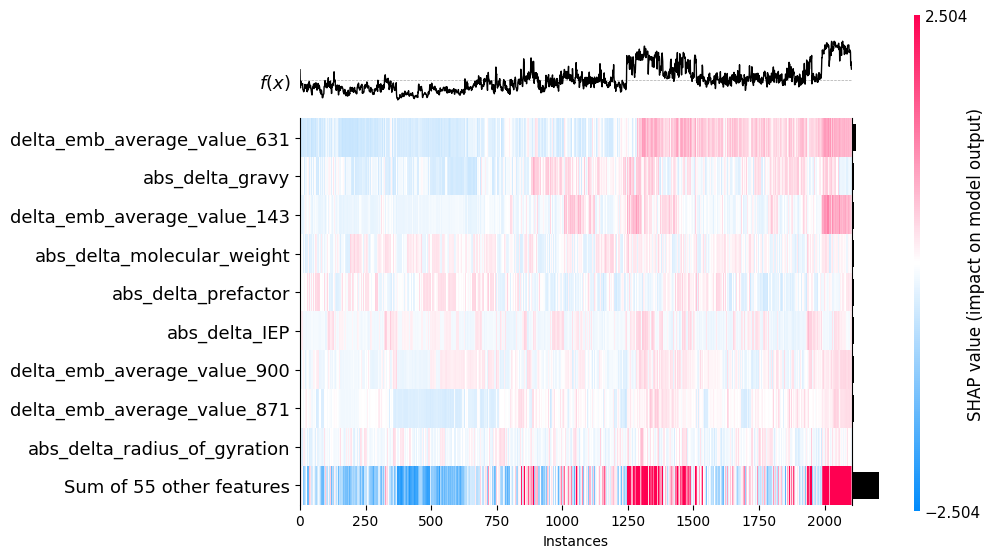

<Axes: xlabel='Instances'>

In [4]:

explainer = shap.Explainer(model_xg, average_X)
shap_values = explainer(average_X)
shap.plots.heatmap(shap_values)

['delta_emb_average_value_631', 'abs_delta_gravy', 'delta_emb_average_value_143', 'abs_delta_molecular_weight', 'abs_delta_prefactor', 'abs_delta_IEP', 'delta_emb_average_value_900', 'delta_emb_average_value_871', 'abs_delta_radius_of_gyration', 'delta_emb_average_value_820', 'delta_emb_average_value_156', 'delta_emb_average_value_964', 'delta_emb_average_value_306', 'delta_emb_average_value_404', 'delta_emb_average_value_885', 'delta_emb_average_value_745', 'abs_delta_fraction_G', 'delta_emb_average_value_331', 'abs_delta_scaling_exponent', 'delta_emb_average_value_985', 'delta_emb_average_value_245', 'abs_delta_fraction_L', 'delta_emb_average_value_179', 'delta_emb_average_value_138', 'abs_delta_Neg_charge', 'abs_delta_Alipatic', 'abs_delta_end_to_end_distance', 'abs_delta_asphericity', 'delta_emb_average_value_333', 'delta_emb_average_value_922', 'delta_emb_average_value_808', 'abs_delta_lcs_fraction', 'delta_emb_average_value_788', 'abs_delta_lcs_score', 'abs_delta_fraction_S', 'ab

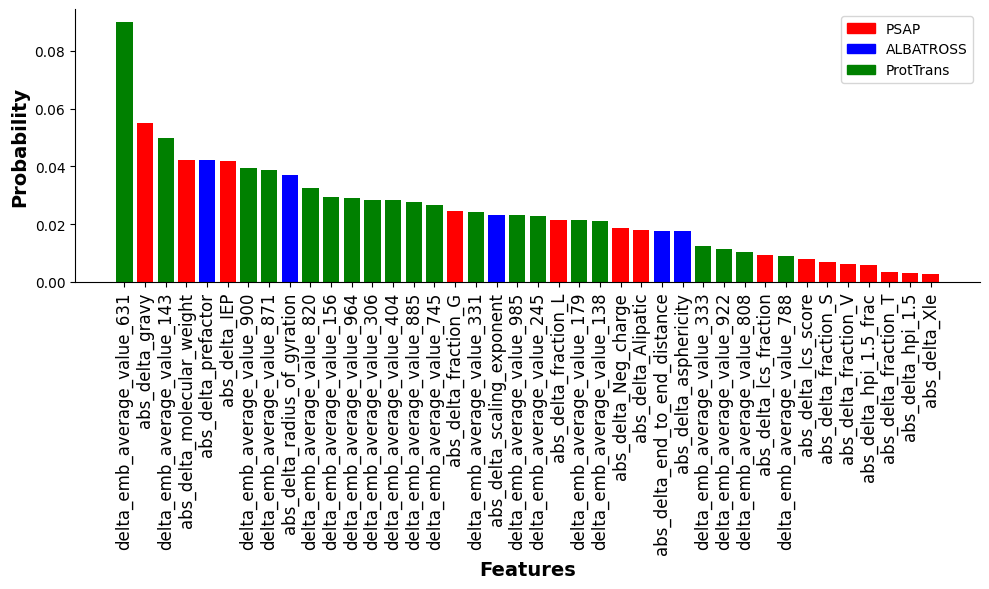

In [5]:
shap_importance = pd.DataFrame({
    'Feature': average_X.columns,
    'Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Normalize to get probabilities
shap_importance['Probability'] = shap_importance['Importance'] / shap_importance['Importance'].sum()
shap_importance = shap_importance.head(40)
# Display feature importance with probabilities
print(shap_importance.Feature.tolist())

all_features = shap_importance.Feature.tolist()
group_1 = ['abs_delta_hpi_1.5_frac',
 'abs_delta_hpi_1.5',
 'abs_delta_hpi_2.0_frac',
 'abs_delta_hpi_2.0',
 'abs_delta_hpi_2.5_frac',
 'abs_delta_hpi_2.5',
 'abs_delta_length',
 'abs_delta_fraction_A',
 'abs_delta_fraction_C',
 'abs_delta_fraction_D',
 'abs_delta_fraction_E',
 'abs_delta_fraction_F',
 'abs_delta_fraction_G',
 'abs_delta_fraction_H',
 'abs_delta_fraction_I',
 'abs_delta_fraction_K',
 'abs_delta_fraction_L',
 'abs_delta_fraction_M',
 'abs_delta_fraction_N',
 'abs_delta_fraction_P',
 'abs_delta_fraction_Q',
 'abs_delta_fraction_R',
 'abs_delta_fraction_S',
 'abs_delta_fraction_T',
 'abs_delta_fraction_V',
 'abs_delta_fraction_W',
 'abs_delta_fraction_Y',
 'abs_delta_IEP',
 'abs_delta_molecular_weight',
 'abs_delta_gravy',
 'abs_delta_Asx',
 'abs_delta_Glx',
 'abs_delta_Xle',
 'abs_delta_Pos_charge',
 'abs_delta_Neg_charge',
 'abs_delta_Aromatic',
 'abs_delta_Alipatic',
 'abs_delta_lcs_score',
 'abs_delta_lcs_fraction']
group_2 = ['abs_delta_asphericity',
 'abs_delta_radius_of_gyration',
 'abs_delta_end_to_end_distance',
 'abs_delta_scaling_exponent',
 'abs_delta_prefactor']

# Define colors for groups
group_colors = {feature: 'red' if feature in group_1 else 'blue' if feature in group_2 else 'green' for feature in all_features}
plt.figure(figsize=(10, 6))
plt.bar(shap_importance['Feature'], shap_importance['Probability'], color=[group_colors.get(f, 'black') for f in shap_importance['Feature']])
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Probability', fontsize=14, weight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
sns.despine()


from matplotlib.patches import Patch
legend_labels = [Patch(color='red', label='PSAP'),
                 Patch(color='blue', label='ALBATROSS'),
                 Patch(color='green', label='ProtTrans')]
plt.legend(handles=legend_labels, loc='upper right')
plt.tight_layout()
plt.savefig('feature_importance_model.png', dpi=300)
plt.show()
